# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

import itertools as it
import functools


/home/dhash/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/dhash/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [3]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Bob', 'Alice', 'Chuck']

Here's how we add edges between nodes.

In [4]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Bob', 'Chuck'), ('Bob', 'Alice'), ('Alice', 'Bob'), ('Alice', 'Chuck')]

And here's how to draw the graph.

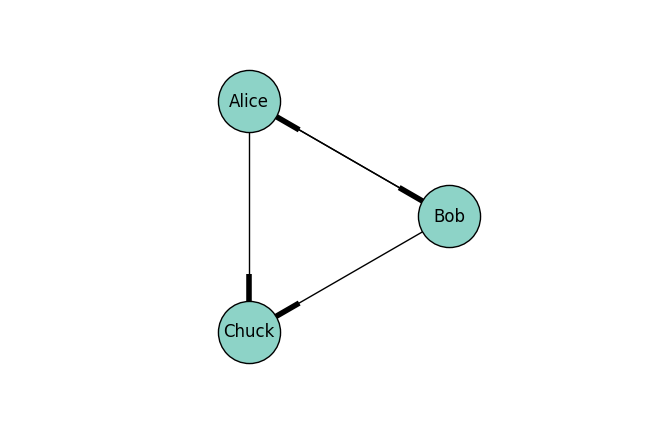

In [5]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

(-1.5, 1.5, -1.5, 1.5)

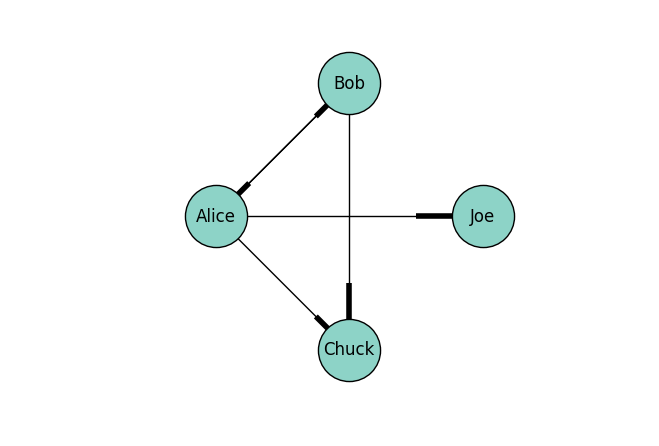

In [6]:
G.add_node('Joe')
G.add_edge('Alice', 'Joe')
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [7]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [8]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['Philly', 'NYC', 'Albany', 'Boston']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [9]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [10]:
G.add_edges_from(drive_times)
G.edges()

[('Philly', 'NYC'), ('NYC', 'Boston'), ('NYC', 'Albany'), ('Albany', 'Boston')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

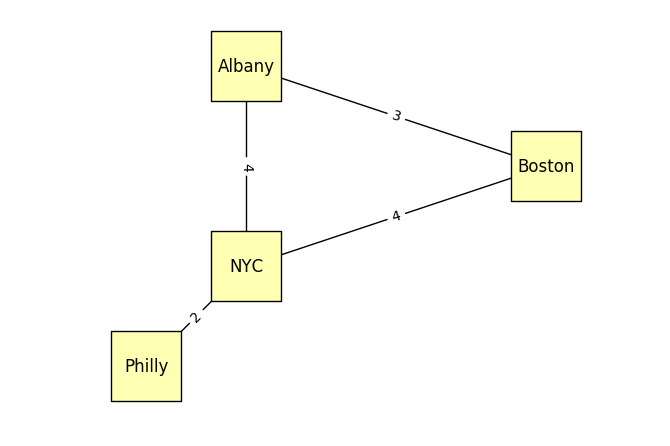

In [11]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

(-78.0, -70.0, 36.0, 44.0)

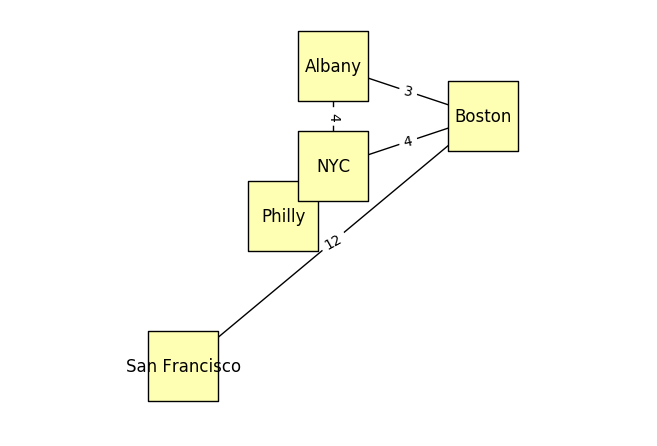

In [12]:
G.add_node("San Francisco")
G.add_edge("San Francisco", "Boston", weight=12)
pos['San Francisco'] = (-77, 37) 
drive_times[('San Francisco', 'Boston')] = 12
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [13]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [14]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [15]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

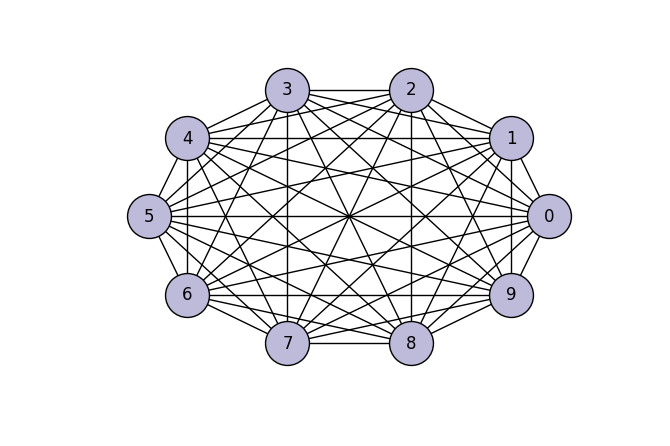

In [16]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [17]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

In [18]:
def make_complete_digraph(n):
    V = range(0, n)
    E = it.permutations(V, 2)
    
    G = nx.DiGraph()
    G.add_nodes_from(V)
    G.add_edges_from(E)
    
    return G

In [19]:
complete_digraph = make_complete_digraph(5)
len(complete_digraph.nodes())

5

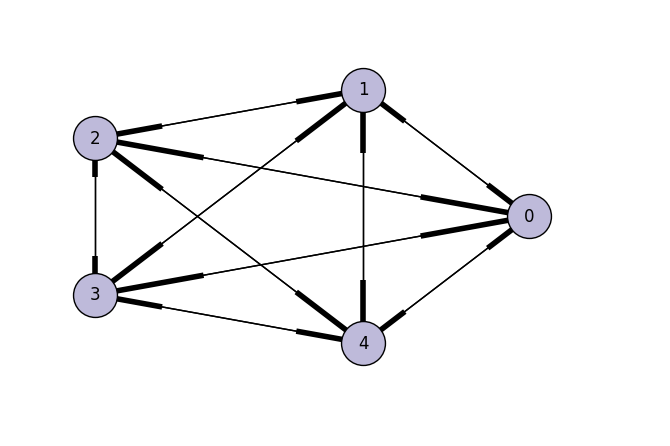

In [20]:
nx.draw_circular(complete_digraph, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [21]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [22]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [23]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [24]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

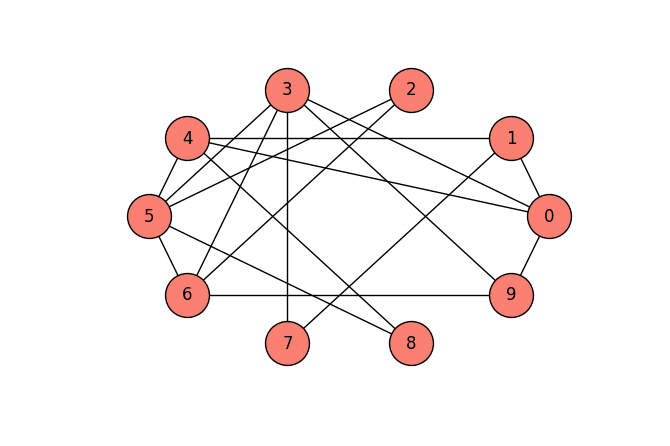

In [25]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [26]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [27]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [28]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [29]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [30]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [31]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [32]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [33]:
def is_strongly_connected_digraph(G):
    res = [(reachable_nodes(G, n) == set(G.nodes())) for n in G.nodes()]
    res = functools.reduce(lambda x, y: x and y, res)
    return res

def is_weakly_connected_digraph(G):
    res = [(reachable_nodes(G, n) == set(G.nodes())) for n in G.nodes()]
    res = functools.reduce(lambda x, y: x or y, res)
    return res

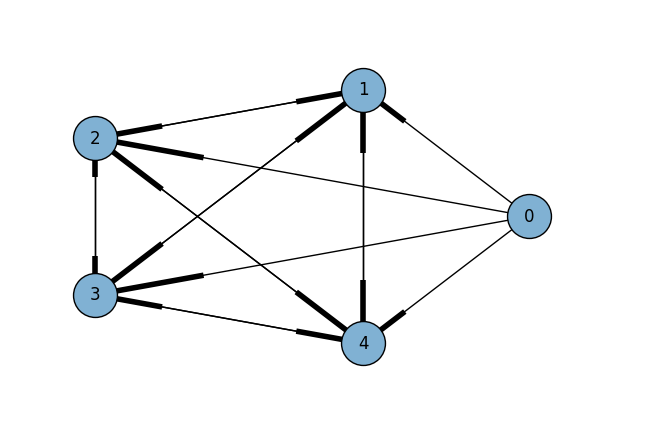

In [34]:
complete_digraph.remove_edge(1, 0)
complete_digraph.remove_edge(2, 0)
complete_digraph.remove_edge(3, 0)
complete_digraph.remove_edge(4, 0)

nx.draw_circular(complete_digraph, 
                 node_color=COLORS[4], 
                 node_size=1000, 
                 with_labels=True)

In [35]:
is_strongly_connected_digraph(complete_digraph)

False

In [36]:
is_weakly_connected_digraph(complete_digraph)

True

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [37]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [38]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6494

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [39]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [40]:
ps = np.logspace(-1.3, 0, 100)
ps

array([ 0.05011872,  0.05165725,  0.05324301,  0.05487745,  0.05656206,
        0.05829839,  0.06008802,  0.06193258,  0.06383377,  0.06579332,
        0.06781303,  0.06989473,  0.07204034,  0.07425181,  0.07653118,
        0.07888051,  0.08130196,  0.08379774,  0.08637014,  0.08902151,
        0.09175427,  0.09457091,  0.09747402,  0.10046625,  0.10355034,
        0.1067291 ,  0.11000543,  0.11338235,  0.11686293,  0.12045035,
        0.1241479 ,  0.12795896,  0.13188701,  0.13593564,  0.14010855,
        0.14440956,  0.14884261,  0.15341174,  0.15812113,  0.16297508,
        0.16797805,  0.17313459,  0.17844942,  0.18392741,  0.18957357,
        0.19539304,  0.20139116,  0.20757341,  0.21394544,  0.22051307,
        0.22728232,  0.23425937,  0.2414506 ,  0.24886258,  0.25650209,
        0.26437612,  0.27249186,  0.28085674,  0.2894784 ,  0.29836472,
        0.30752384,  0.31696412,  0.32669419,  0.33672296,  0.34705958,
        0.35771352,  0.36869451,  0.38001259,  0.3916781 ,  0.40

I'll estimate the probabilities with `iters=1000`

In [41]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0516572536357 0.0
0.0532430132722 0.0
0.0548774521056 0.001
0.0565620644761 0.001
0.0582983905966 0.0
0.060088017961 0.0
0.0619325827958 0.0
0.0638337715557 0.0
0.0657933224658 0.002
0.0678130271107 0.0
0.0698947320727 0.0
0.0720403406199 0.0
0.0742518144461 0.001
0.076531175465 0.002
0.0788805076583 0.001
0.0813019589811 0.001
0.0837977433258 0.003
0.0863701425464 0.002
0.0890215085445 0.003
0.0917542654197 0.004
0.0945709116859 0.003
0.0974740225557 0.01
0.100466252295 0.007
0.103550336649 0.004
0.106729095345 0.012
0.110005434668 0.01
0.113382350122 0.01
0.116862929163 0.02
0.120450354026 0.019
0.124147904634 0.024
0.127958961597 0.019
0.131887009298 0.024
0.135935639088 0.04
0.14010855256 0.041
0.144409564939 0.047
0.14884260857 0.058
0.153411736509 0.068
0.158121126234 0.083
0.162975083462 0.077
0.167978046084 0.095
0.173134588226 0.141
0.178449424427 0.136
0.183927413954 0.128
0.189573565241 0.185
0.195393040469 0.213
0.201391160288 0.217
0.207573408678 0.25

And then plot them, adding a vertical line at the computed critical value

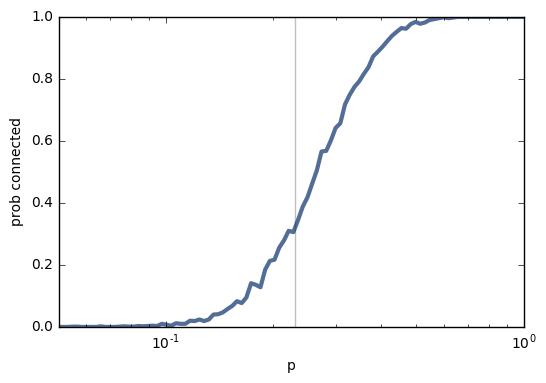

In [42]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

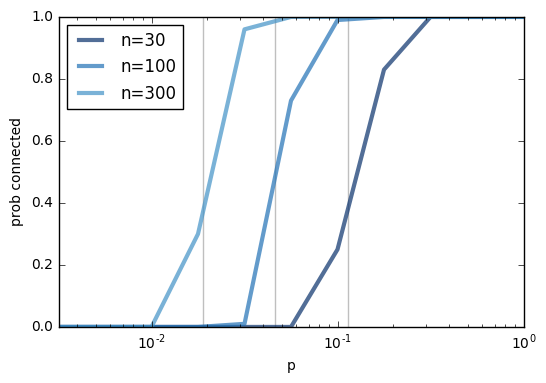

In [43]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

$\textbf{O}(n+m)$, which means whatever is bigger, $n$ or $m$. 

It contains an $O(1), O(n+m),$ and $O(1)$ operation.

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [45]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(set(G[node]) - seen)
    return seen

complete = make_complete_graph(100)

In [46]:
%timeit len(reachable_nodes(complete, 0))

1000 loops, best of 3: 1.14 ms per loop


In [47]:
%timeit len(reachable_nodes_precheck(complete, 0))

1000 loops, best of 3: 931 µs per loop


The check to eliminate duplicate nodes removes the number of duplicate nodes * the hash time from the total cost.

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [48]:
from random import sample

def m_pairs(nodes, m):
    pairs = it.permutations(nodes, 2)
    return sample(list(pairs), m)

def make_m_graph(n, m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G

In [49]:
def prob_m_connected(n, m, iters=100):
    count = 0
    for i in range(iters):
        m_graph = make_m_graph(n, m)
        if is_weakly_connected_digraph(m_graph):
            count += 1
    return count/iters

n = 30
pstar = np.log(n) / n
ps = np.logspace(-1.3, 0, 30)
ms = [int(p * n * (n-1) / 2) for p in ps]
ys = [prob_m_connected(n, m, 100) for m in ms]

for p, m, y in zip(ps, ms, ys):
    print(p, m, y)

0.0501187233627 21 0.0
0.055568360851 24 0.0
0.0616105622907 26 0.0
0.0683097598642 29 0.0
0.075737391759 32 0.01
0.0839726639627 36 0.06
0.0931033948916 40 0.08
0.103226951859 44 0.23
0.11445128937 49 0.41
0.126896100317 55 0.43
0.140694092345 61 0.66
0.155992403007 67 0.8
0.172954168796 75 0.84
0.191760264778 83 0.92
0.21261123339 92 0.93
0.235729422964 102 1.0
0.261361358782 113 1.0
0.289780371942 126 1.0
0.321289514082 139 1.0
0.356224789026 154 1.0
0.394958735829 171 1.0
0.437904401414 190 1.0
0.485519745185 211 1.0
0.538312522557 234 1.0
0.596845699512 259 1.0
0.661743455891 287 1.0
0.733697841456 319 1.0
0.813476155699 353 1.0
0.901929130087 392 1.0
1.0 435 1.0


0.113373246055
0.113373246055


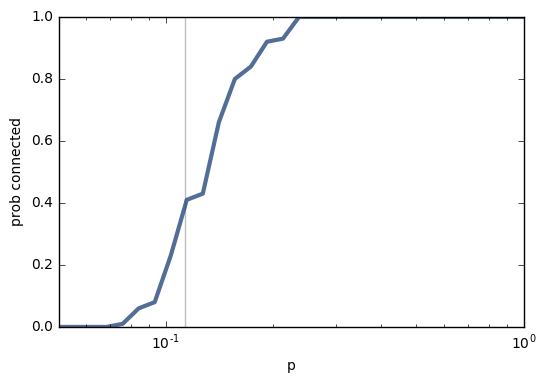

In [77]:
thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
print(pstar)
print(np.log(n)/n)

The ER experiment is really interesting, and agrees with the original $\dfrac{\log_2n}{n}$ thesis.

I'm not sure why.

COmplexity science is interesting to me to classify problems and make effective reductions to already established algorithims or problems (CLIQUE, SAT, KNAPSACK, GI). I really like approximation algorithims, as well as effective heuristic development as well, they're fascinating from a "how to think about this problem" viewpoints/

I expect my perspective to evolve as i understand and gain intuation on how to reduce problems effectivley.

In [67]:
def is_circle_graph(G):
    start = G.nodes()[0]
    seen = set()
    neigh = [start]
    while len(seen) <= len(G.nodes()):
        neigh = G.neighbors(neigh[0])
        if len(neigh) != 1:
            print("len check failed")
            return False
        if neigh[0] in seen and (len(seen) != len(G.nodes())):
            print("inside set failed", neigh[0], seen)
            return False
        seen.add(neigh[0])
        if len(seen) == len(G.nodes()):
            return True

In [68]:
circle_graph = nx.DiGraph()

In [69]:
circle_graph.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

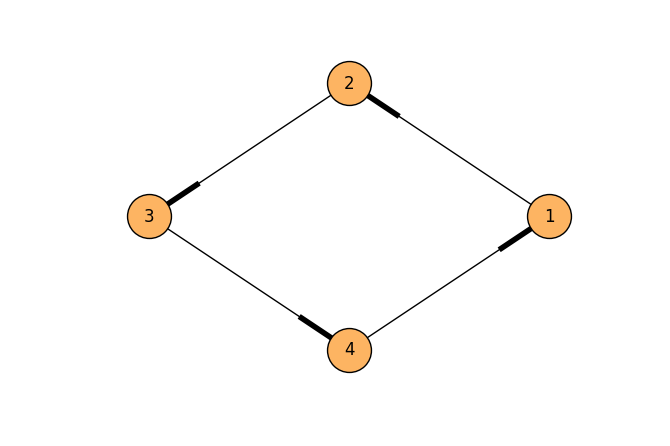

In [70]:
nx.draw_circular(circle_graph, 
                 node_color=COLORS[5], 
                 node_size=1000, 
                 with_labels=True)

In [71]:
is_circle_graph(circle_graph)

True

In [72]:
non_circular_graph = nx.DiGraph()
non_circular_graph.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 2)])

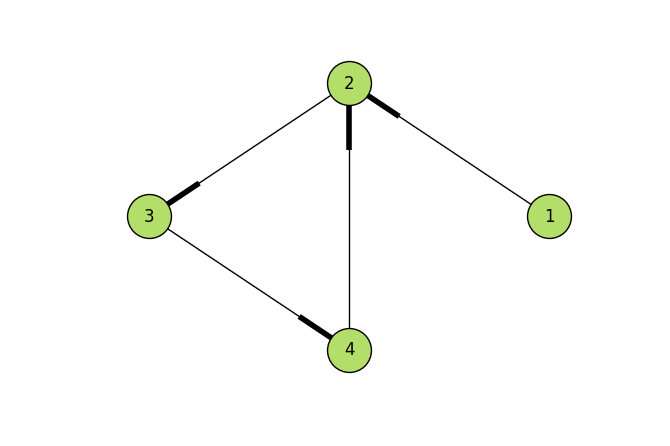

In [73]:
nx.draw_circular(non_circular_graph, 
                 node_color=COLORS[6], 
                 node_size=1000, 
                 with_labels=True)

In [74]:
is_circle_graph(non_circular_graph)

inside set failed 2 {2, 3, 4}


False